- Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

- Lendo os dados

In [2]:
culinaria = pd.read_csv('Cuisine_rating.csv')
culinaria.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


- Informações do dados

In [3]:
culinaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


- Arrumando problemas de registro de dados

In [4]:
culinaria['Location'].value_counts()

Location
St. George,NY         46
Upper East Side,NY    30
Riverdale,NY          28
Central Park,NY       24
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Central Park,ny        8
Market City, MY        2
Cedar Hill, NY         2
Name: count, dtype: int64

In [5]:
culinaria['Location'] = culinaria['Location'].replace({'Central Park,ny':'Central Park,NY', 'Market City, MY':'Market City, NY'})
culinaria['Location'].value_counts()

Location
St. George,NY         46
Central Park,NY       32
Upper East Side,NY    30
Riverdale,NY          28
Market City, NY       22
China Town, NY        22
Upper West Side,NY    18
Cedar Hill, NY         2
Name: count, dtype: int64

- Selecionando orçamento, avaliação da comida, avaliação do serviço e avaliação geral para descrição estatística

In [6]:
culinaria.iloc[:, 5:].describe().round(2)

,Budget,Food Rating,Service Rating,Overall Rating
count,200.00,200.00,200.00,200.00
mean,3.82,3.22,3.23,3.22
std,1.06,1.41,1.53,1.08
min,1.00,1.00,1.00,1.00
25%,3.00,2.00,2.00,2.50
50%,4.00,3.00,3.00,3.00
75%,5.00,5.00,5.00,4.00
max,5.00,5.00,5.00,5.00


- Quantidade de tipos de culinárias

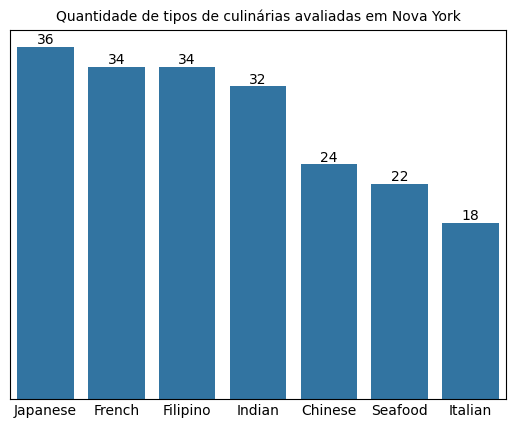

In [22]:
culina = culinaria['Cuisines'].value_counts(ascending= False)

ax = sn.barplot(x= culina.index, y=culina.values) 
ax.set_title('Quantidade de tipos de culinárias avaliadas em Nova York', fontsize = 10)
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')
ax.bar_label(ax.containers[0])
ax.tick_params(length=0) 

- Avaliação média da comida dos restaurante japonês, francês e filipino (avaliação de 1 a 5)

In [8]:
culinaria_japonesa = culinaria[culinaria['Cuisines']  == 'Japanese']
culinaria_francesa = culinaria[culinaria['Cuisines']  == 'French']
culinaria_Filipina = culinaria[culinaria['Cuisines']  == 'Filipino']

print(f'Médias dos tipos de restaurantes com as melhores avaliações da comida\nJaponesa: {culinaria_japonesa['Food Rating'].mean().round(2)}\nFrancesa: {culinaria_francesa['Food Rating'].mean().round(2)}\nFilipina: {culinaria_Filipina['Food Rating'].mean().round(2)}')

Médias dos tipos de restaurantes com as melhores avaliações da comida
Japonesa: 3.86
Francesa: 3.29
Filipina: 2.71


- Avaliação dos restaurantes por bairros em Nova York

In [9]:
num_cols = culinaria.iloc[:, 5:].select_dtypes(include= np.number).columns.to_list()
culinaria.groupby(['Location', 'Cuisines'])[num_cols].mean().round(2)

Budget  Food Rating  Service Rating  \
Location           Cuisines                                        
Cedar Hill, NY     Indian      4.00         2.00            5.00   
Central Park,NY    Chinese     4.00         4.50            2.50   
                   Filipino    3.25         2.50            4.50   
                   French      3.67         4.67            3.00   
                   Indian      3.67         2.17            4.33   
                   Italian     4.00         5.00            5.00   
                   Japanese    2.50         4.25            4.00   
                   Seafood     3.00         2.50            1.50   
China Town, NY     Chinese     3.00         2.00            5.00   
                   Filipino    1.00         1.00            5.00   
                   French      3.50         3.00            2.00   
                   Indian      4.33         2.33            4.67   
                   Seafood     3.50         3.38            3.00   
Market City, NY    Filipino    5.00         5.00            5.00   
                   French      4.00         3.00            2.50   
                   Indian      2.33         3.67            2.33   
                   Japanese    4.67         4.50            3.33   
                   Seafood     3.00         4.50            4.50   
Riverdale,NY       Chinese     4.50         3.50            2.00   
                   Filipino    4.33         2.50            2.83   
                   French      4.00         2.00            5.00   
                   Italian     3.67         3.67            3.50   
                   Japanese    4.50         3.12            3.50   
                   Seafood     5.00         2.50            1.00   
St. George,NY      Chinese     4.50         4.00            2.75   
                   Filipino    4.00         2.50            3.00   
                   French      4.50         3.00            2.88   
                   Indian      3.38         3.38            2.75   
                   Italian     2.50         4.50            3.00   
                   Japanese    4.40         4.20            2.60   
Upper East Side,NY Chinese     4.00         3.80            3.60   
                   Filipino    3.00         4.50            2.00   
                   French      3.67         3.00            2.00   
                   Indian      3.00         1.00            5.00   
                   Italian     5.00         1.00            2.50   
                   Japanese    3.67         3.00            3.33   
Upper West Side,NY Chinese     4.00         1.00            2.00   
                   Filipino    4.00         3.00            1.00   
                   French      4.00         3.50            4.50   
                   Indian      3.00         3.50            2.00   
                   Italian     5.00         2.00            2.00   
                   Japanese    4.00         5.00            5.00   
                   Seafood     4.00         2.75            4.25   

                             Overall Rating  
Location           Cuisines                  
Cedar Hill, NY     Indian              3.50  
Central Park,NY    Chinese             3.50  
                   Filipino            3.50  
                   French              3.83  
                   Indian              3.25  
                   Italian             5.00  
                   Japanese            4.12  
                   Seafood             2.00  
China Town, NY     Chinese             3.50  
                   Filipino            3.00  
                   French              2.50  
                   Indian              3.50  
                   Seafood             3.19  
Market City, NY    Filipino            5.00  
                   French              2.75  
                   Indian              3.00  
                   Japanese            3.92  
                   Seafood             4.50  
Riverdale,NY       Chinese             2.75  
  